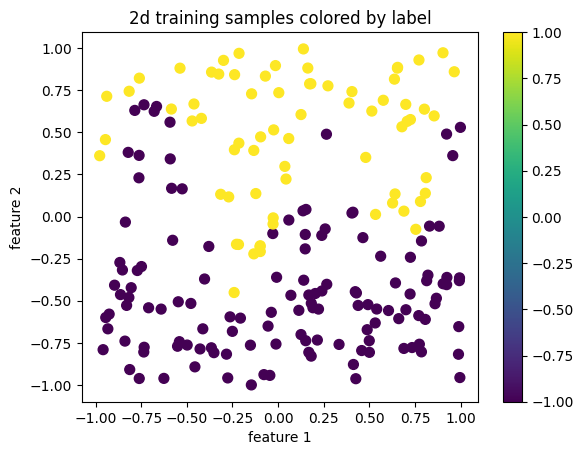

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


n = 200;
p = 2;
X = 2*(np.random.rand(n,p)-.5)
y = np.sign(X[:,1]-(X[:,0]**2/2+np.sin(X[:,0]*7)/2))

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], 50, c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by label')
plt.show()

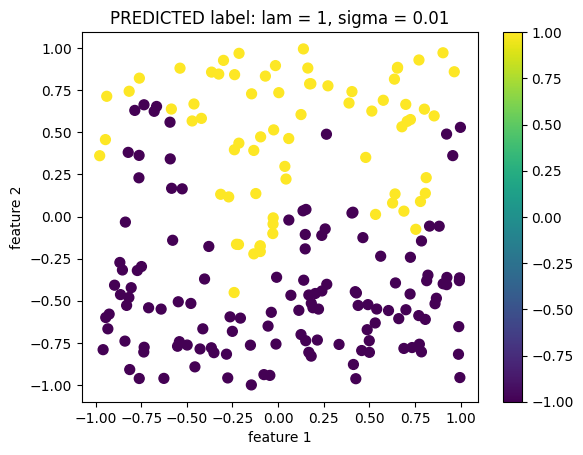

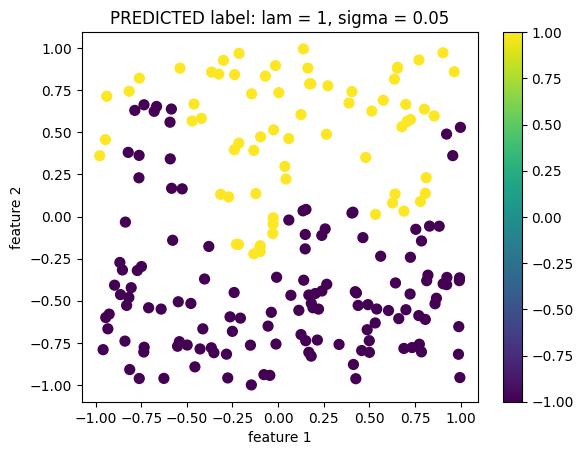

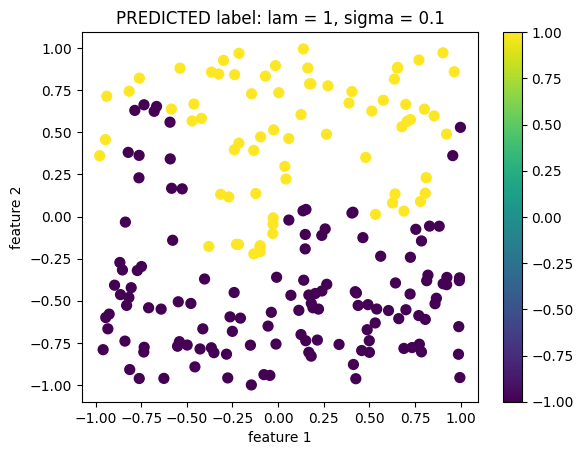

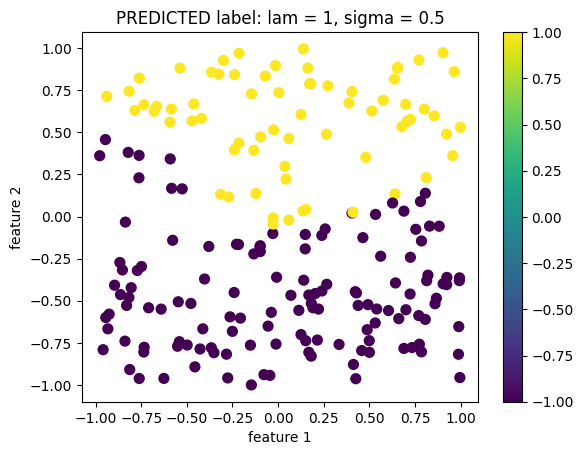

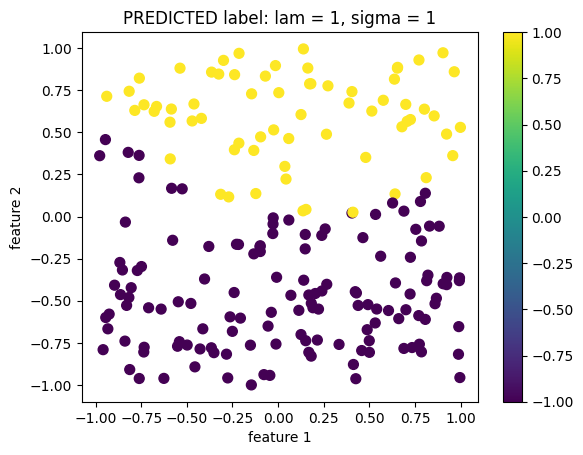

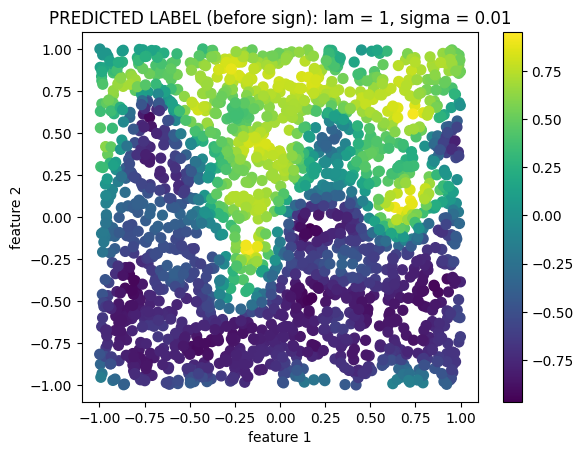

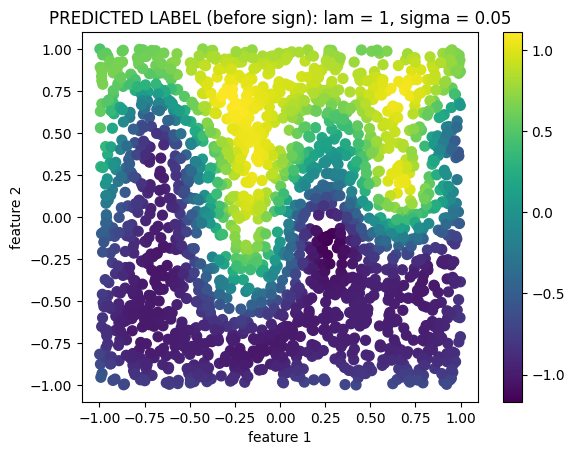

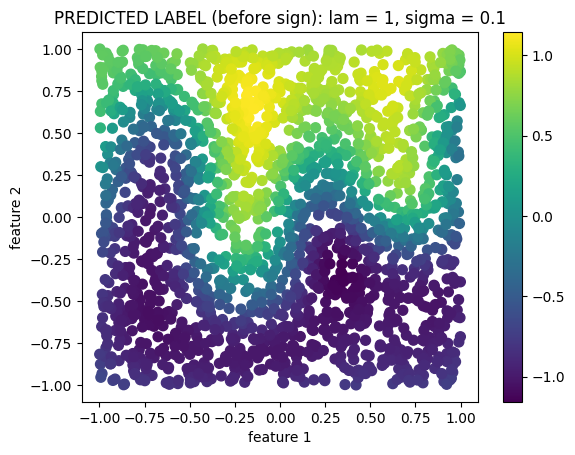

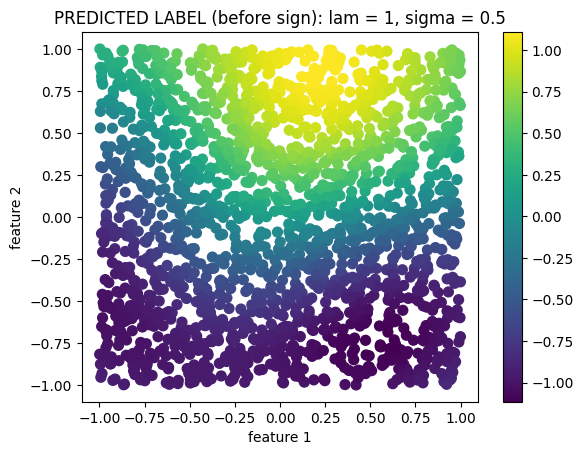

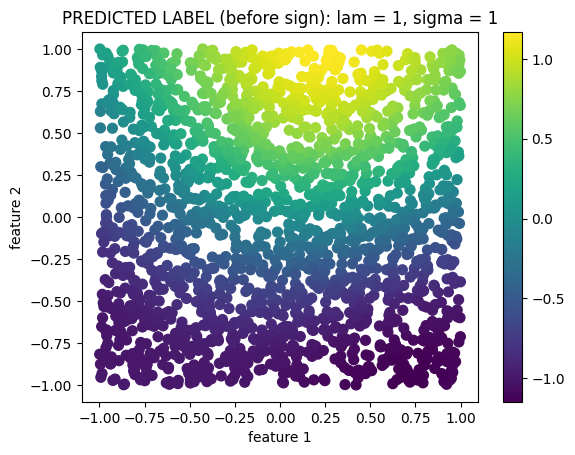

In [7]:
sigma_values = [0.01, 0.05, 0.1, 0.5, 1]
alphas = []
lam = 1

### YOUR CODE STARTS HERE ###

def gaussian(matrix):
  row_sums = np.sum(matrix**2, axis=1).reshape(-1, 1)  # Square sums of each row, reshaped to column vector
  return row_sums + row_sums.T - 2 * np.dot(matrix, matrix.T)
# Apply the Gaussian function to the distance matrix


for i, sigma in enumerate(sigma_values):
  squared = gaussian(X)
  K = np.exp(-squared / (2 * sigma))
  alpha = np.matrix(np.linalg.inv(K+lam*np.identity(n))@y).T
  alphas.append(alpha)
  yhat=K@alpha




### YOUR CODE ENDS HERE ###

  y2 = np.array(np.sign(yhat))
  plt.figure(2+i)
  plt.scatter(X[:, 0], X[:, 1], 50, c=y2)
  plt.colorbar()
  plt.xlabel('feature 1')
  plt.ylabel('feature 2')
  plt.title('PREDICTED label: lam = 1, sigma = ' + str(sigma))
  plt.show()



ntest = 2000;
Xtest = 2*(np.random.rand(ntest,p)-.5)

### YOUR CODE STARTS HERE ###

for i, sigma in enumerate(sigma_values):


  # Calculate the norms of each sample
  test_norm = np.sum(Xtest**2, axis=1).reshape(-1, 1)
  train_norm = np.sum(X**2, axis=1).reshape(1, -1)

  # Compute squared Euclidean distances using broadcasting
  sq_distances = test_norm + train_norm - 2 * np.dot(Xtest, X.T)

  # Compute the Gaussian kernel matrix
  K_test_train = np.exp(-sq_distances / (2 * sigma))


  ytest = K_test_train@alphas[i]
  ### YOUR CODE ENDS HERE ###



  plt.figure(5+i)
  plt.scatter(Xtest[:,0], Xtest[:,1], 50, c=np.array(ytest))
  plt.colorbar()
  plt.xlabel('feature 1')
  plt.ylabel('feature 2')
  plt.title('PREDICTED LABEL (before sign): lam = 1, sigma = ' + str(sigma))
  plt.show()

When varying the value of sigma, it seems that higher values of sigma result in classifiers that have less curve and are more linear. In contrast, lower values of sigma are more "curvy". This may be because with low value of sigma, the SVM decision boundary is dependent on points closest to the decision boundary, ignoring points further away. This leads to more curvature in the boundary decision.